In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import pandas as pd

In [5]:
datagfp = pd.read_excel("data/2017-08-18_seq6_Huh7_eGFP_CHX_#molecules.xlsx",sheet_name="#GFP")
datarfp = pd.read_excel("data/2017-09-08_seq6_Huh7_CayRFP_CHX_#molecules.xlsx",sheet_name="#RFP")

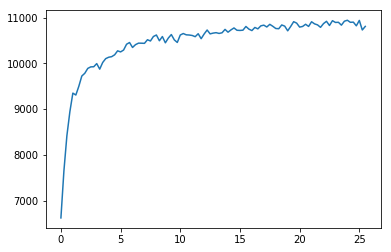

In [8]:
plt.plot(datagfp["Time [h]"],datagfp["#10^3 molecules  eGFP .1"])

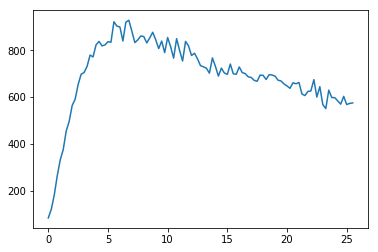

In [9]:
t = datarfp["Time [h]"]
tt = datarfp["Time [h]"]
data = datarfp["#10^3 molecules CayRFP.2"]
noise = np.sqrt(np.abs(data))
plt.plot(t,data)

In [10]:
def model(t, G0, Gu0, beta, km):
    """General fixed expression model function"""
    return G0 * np.exp(-beta * t) + Gu0 * (np.exp(-beta * t) - np.exp(-(beta+km) * t))

def red(t, G0r, Gu0r, betr, kmr):
    """Model function for fixed RFP data"""
    return model(t=t, G0=G0r, Gu0=Gu0r, beta=betr, km=kmr)

def green(t, G0g, Gu0g, betg, kmg):
    """Model function for fixed GFP data"""
    return model(t=t, G0=G0g, Gu0=Gu0g, beta=betg, km=kmg)


In [37]:
# Set default parameter values
G0r_0 = 100
Gu0r_0 = 1000
betr_0 = 0.04
kmr_0 = 0.3

G0g_0 = 2000
Gu0g_0 = 2000
betg_0 = 0.04
kmg_0 = 0.1

red_model = lm.Model(red)
green_model = lm.Model(green)

pars = red_model.make_params()
pars['G0r'].set(value=G0r_0,vary=True)
pars['Gu0r'].set(value=Gu0r_0,vary=True)
pars['betr'].set(value=betr_0,vary=True)
pars['kmr'].set(value=kmr_0,vary=True)

out = red_model.fit(data, pars, t=tt, weights=1/noise)
print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 103
    # variables        = 4
    chi-square         = 122.722351
    reduced chi-square = 1.23961970
    Akaike info crit   = 26.0451369
    Bayesian info crit = 36.5840529
[[Variables]]
    G0r:   657.640530 +/- 25.4960091 (3.88%) (init = 100)
    Gu0r:  291.552337 +/- 26.0470014 (8.93%) (init = 1000)
    betr:  0.00435158 +/- 5.9028e-04 (13.56%) (init = 0.04)
    kmr:   1.44454633 +/- 0.26177953 (18.12%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(G0r, Gu0r) = -0.944
    C(G0r, kmr)  = -0.523
    C(betr, kmr) = -0.415
    C(Gu0r, kmr) =  0.355



In [21]:
out.covar

array([[  8.19787567e+01,  -2.52579674e+01,   2.54688213e-03,
         -7.76132559e-02],
       [ -2.52579674e+01,   5.73735735e+02,   2.73324666e-02,
         -3.05761476e-01],
       [  2.54688213e-03,   2.73324666e-02,   1.58963578e-06,
         -1.82613418e-05],
       [ -7.76132559e-02,  -3.05761476e-01,  -1.82613418e-05,
          3.22466962e-04]])

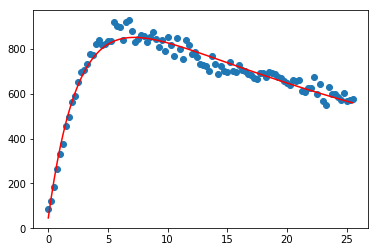

In [15]:
plt.plot(t,data,"o")
plt.plot(t, out.best_fit, 'r-')

In [47]:
fits_r = []
covars_r = []
for dataset in datarfp.keys()[1:]:
    data = datarfp[dataset]
    noise = np.sqrt(np.abs(data))
    
    pars = red_model.make_params()
    pars['G0r'].set(value=data[0],vary=False,min=0)
    pars['Gu0r'].set(value=Gu0r_0,vary=True,min=0)
    pars['betr'].set(value=betr_0,vary=True,min=0)
    pars['kmr'].set(value=kmr_0,vary=True,min=0)

    out = red_model.fit(data, pars, t=tt, weights=1/noise)
    print(out.fit_report(min_correl=0.25))
    fits_r.append(out.values)
    covars_r.append(out.covar)

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 363.191035
    reduced chi-square = 3.63191035
    Akaike info crit   = 135.800598
    Bayesian info crit = 143.704784
[[Variables]]
    G0r:   88.61769 (fixed)
    Gu0r:  1244.71994 +/- 70.3984870 (5.66%) (init = 1000)
    betr:  0.04161511 +/- 0.00272313 (6.54%) (init = 0.04)
    kmr:   0.24715919 +/- 0.02113381 (8.55%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.979
    C(Gu0r, kmr)  = -0.950
    C(betr, kmr)  = -0.907

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 103
    # variables        = 3
    chi-square         = 163.956296
    reduced chi-square = 1.63956296
    Akaike info crit   = 53.8817041
    Bayesian info crit = 61.7858910
[[Variables]]
    G0r:   186.8202 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 103
    # variables        = 3
    chi-square         = 1156.09284
    reduced chi-square = 11.5609284
    Akaike info crit   = 255.061454
    Bayesian info crit = 262.965641
[[Variables]]
    G0r:   3501.323 (fixed)
    Gu0r:  17380.6695 +/- 321.595119 (1.85%) (init = 1000)
    betr:  0.02698262 +/- 8.4939e-04 (3.15%) (init = 0.04)
    kmr:   0.32581283 +/- 0.01102000 (3.38%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.969
    C(Gu0r, kmr)  = -0.899
    C(betr, kmr)  = -0.843

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 358.856289
    reduced chi-square = 3.58856289
    Akaike info crit   = 134.563880
    Bayesian info crit = 142.468067
[[Variables]]
    G0r:   974.9627 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 251.359049
    reduced chi-square = 2.51359049
    Akaike info crit   = 97.8918003
    Bayesian info crit = 105.795987
[[Variables]]
    G0r:   604.0128 (fixed)
    Gu0r:  3607.19012 +/- 61.9881240 (1.72%) (init = 1000)
    betr:  0.02764863 +/- 8.2988e-04 (3.00%) (init = 0.04)
    kmr:   0.35061981 +/- 0.01146521 (3.27%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.965
    C(Gu0r, kmr)  = -0.885
    C(betr, kmr)  = -0.825

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 222.616352
    reduced chi-square = 2.22616352
    Akaike info crit   = 85.3842535
    Bayesian info crit = 93.2884405
[[Variables]]
    G0r:   478.5691 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 103
    # variables        = 3
    chi-square         = 1280.52883
    reduced chi-square = 12.8052883
    Akaike info crit   = 265.590841
    Bayesian info crit = 273.495028
[[Variables]]
    G0r:   1755.875 (fixed)
    Gu0r:  9907.75454 +/- 197.408768 (1.99%) (init = 1000)
    betr:  0.02616821 +/- 9.8909e-04 (3.78%) (init = 0.04)
    kmr:   0.40764061 +/- 0.01699505 (4.17%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.956
    C(Gu0r, kmr)  = -0.849
    C(betr, kmr)  = -0.783

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 103
    # variables        = 3
    chi-square         = 364.934623
    reduced chi-square = 3.64934623
    Akaike info crit   = 136.293891
    Bayesian info crit = 144.198078
[[Variables]]
    G0r:   811.3479 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 103
    # variables        = 3
    chi-square         = 389.814646
    reduced chi-square = 3.89814646
    Akaike info crit   = 143.087064
    Bayesian info crit = 150.991251
[[Variables]]
    G0r:   75.66975 (fixed)
    Gu0r:  787.788472 +/- 33.6194618 (4.27%) (init = 1000)
    betr:  0.03308555 +/- 0.00226712 (6.85%) (init = 0.04)
    kmr:   0.37127904 +/- 0.03003835 (8.09%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.961
    C(Gu0r, kmr)  = -0.875
    C(betr, kmr)  = -0.812

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 131.462210
    reduced chi-square = 1.31462210
    Akaike info crit   = 31.1310157
    Bayesian info crit = 39.0352027
[[Variables]]
    G0r:   259.9676 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 70
    # data points      = 103
    # variables        = 3
    chi-square         = 1271.92944
    reduced chi-square = 12.7192944
    Akaike info crit   = 264.896812
    Bayesian info crit = 272.800999
[[Variables]]
    G0r:   896.9388 (fixed)
    Gu0r:  10149.8447 +/- 297.631843 (2.93%) (init = 1000)
    betr:  0.02921730 +/- 0.00142542 (4.88%) (init = 0.04)
    kmr:   0.27814147 +/- 0.01340722 (4.82%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.975
    C(Gu0r, kmr)  = -0.930
    C(betr, kmr)  = -0.881

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 202.513992
    reduced chi-square = 2.02513992
    Akaike info crit   = 75.6362390
    Bayesian info crit = 83.5404260
[[Variables]]
    G0r:   215.4066 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 103
    # variables        = 3
    chi-square         = 869.768291
    reduced chi-square = 8.69768291
    Akaike info crit   = 225.750279
    Bayesian info crit = 233.654466
[[Variables]]
    G0r:   1857.272 (fixed)
    Gu0r:  8461.58815 +/- 174.892999 (2.07%) (init = 1000)
    betr:  0.02013726 +/- 9.4293e-04 (4.68%) (init = 0.04)
    kmr:   0.34738811 +/- 0.01382793 (3.98%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.966
    C(Gu0r, kmr)  = -0.882
    C(betr, kmr)  = -0.824

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 248.909342
    reduced chi-square = 2.48909342
    Akaike info crit   = 96.8830546
    Bayesian info crit = 104.787242
[[Variables]]
    G0r:   100.2204 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 103
    # variables        = 3
    chi-square         = 1023.09321
    reduced chi-square = 10.2309321
    Akaike info crit   = 242.473259
    Bayesian info crit = 250.377446
[[Variables]]
    G0r:   994.1324 (fixed)
    Gu0r:  8082.07901 +/- 245.241194 (3.03%) (init = 1000)
    betr:  0.03563734 +/- 0.00145201 (4.07%) (init = 0.04)
    kmr:   0.28540113 +/- 0.01431173 (5.01%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.974
    C(Gu0r, kmr)  = -0.927
    C(betr, kmr)  = -0.876

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 286.899904
    reduced chi-square = 2.86899904
    Akaike info crit   = 111.513653
    Bayesian info crit = 119.417840
[[Variables]]
    G0r:   13.95687 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 388.666108
    reduced chi-square = 3.88666108
    Akaike info crit   = 142.783140
    Bayesian info crit = 150.687327
[[Variables]]
    G0r:   1534.414 (fixed)
    Gu0r:  8737.95224 +/- 139.607526 (1.60%) (init = 1000)
    betr:  0.04186849 +/- 7.7092e-04 (1.84%) (init = 0.04)
    kmr:   0.33394270 +/- 0.00960428 (2.88%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.966
    C(Gu0r, kmr)  = -0.903
    C(betr, kmr)  = -0.843

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 103
    # variables        = 3
    chi-square         = 520.988010
    reduced chi-square = 5.20988010
    Akaike info crit   = 172.962798
    Bayesian info crit = 180.866985
[[Variables]]
    G0r:   1640.352 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 311.922661
    reduced chi-square = 3.11922661
    Akaike info crit   = 120.126707
    Bayesian info crit = 128.030894
[[Variables]]
    G0r:   382.5526 (fixed)
    Gu0r:  3080.51172 +/- 83.5070250 (2.71%) (init = 1000)
    betr:  0.03630607 +/- 0.00129825 (3.58%) (init = 0.04)
    kmr:   0.28723408 +/- 0.01292181 (4.50%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.973
    C(Gu0r, kmr)  = -0.927
    C(betr, kmr)  = -0.876

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 103
    # variables        = 3
    chi-square         = 411.990000
    reduced chi-square = 4.11990000
    Akaike info crit   = 148.785819
    Bayesian info crit = 156.690006
[[Variables]]
    G0r:   230.5405 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 152.455428
    reduced chi-square = 1.52455428
    Akaike info crit   = 46.3907591
    Bayesian info crit = 54.2949461
[[Variables]]
    G0r:   365.569 (fixed)
    Gu0r:  2313.84855 +/- 63.4503110 (2.74%) (init = 1000)
    betr:  0.03594380 +/- 0.00120588 (3.35%) (init = 0.04)
    kmr:   0.24720592 +/- 0.01042728 (4.22%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.980
    C(Gu0r, kmr)  = -0.948
    C(betr, kmr)  = -0.905

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 260.005256
    reduced chi-square = 2.60005256
    Akaike info crit   = 101.375204
    Bayesian info crit = 109.279391
[[Variables]]
    G0r:   164.9601 (f

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 856
    # data points      = 103
    # variables        = 3
    chi-square         = 623.499095
    reduced chi-square = 6.23499095
    Akaike info crit   = 191.463688
    Bayesian info crit = 199.367874
[[Variables]]
    G0r:   0 (fixed)
    Gu0r:  56842.7713 +/- 1.8126e+08 (318877.50%) (init = 1000)
    betr:  0.12378248 +/- 2.10054836 (1696.97%) (init = 0.04)
    kmr:   0.00131767 +/- 4.21886575 (320176.91%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, kmr)  = -1.000
    C(Gu0r, betr) =  1.000
    C(betr, kmr)  = -1.000

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 103
    # variables        = 3
    chi-square         = 326.477963
    reduced chi-square = 3.26477963
    Akaike info crit   = 124.824247
    Bayesian info crit = 132.728434
[[Variables]]
    G0r:   0 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 103
    # variables        = 3
    chi-square         = 301.444957
    reduced chi-square = 3.01444957
    Akaike info crit   = 116.607420
    Bayesian info crit = 124.511607
[[Variables]]
    G0r:   523.1302 (fixed)
    Gu0r:  3688.39683 +/- 70.6125514 (1.91%) (init = 1000)
    betr:  0.04528883 +/- 9.9060e-04 (2.19%) (init = 0.04)
    kmr:   0.37403644 +/- 0.01356428 (3.63%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.959
    C(Gu0r, kmr)  = -0.882
    C(betr, kmr)  = -0.816

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 664.650902
    reduced chi-square = 6.64650902
    Akaike info crit   = 198.046894
    Bayesian info crit = 205.951081
[[Variables]]
    G0r:   705.7465 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 184.232832
    reduced chi-square = 1.84232832
    Akaike info crit   = 65.8915503
    Bayesian info crit = 73.7957373
[[Variables]]
    G0r:   181.2711 (fixed)
    Gu0r:  1981.69628 +/- 38.2639826 (1.93%) (init = 1000)
    betr:  0.03905957 +/- 0.00103356 (2.65%) (init = 0.04)
    kmr:   0.37016294 +/- 0.01353391 (3.66%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.960
    C(Gu0r, kmr)  = -0.882
    C(betr, kmr)  = -0.818

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 103
    # variables        = 3
    chi-square         = 619.929763
    reduced chi-square = 6.19929763
    Akaike info crit   = 190.872351
    Bayesian info crit = 198.776538
[[Variables]]
    G0r:   467.8072 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 255.710000
    reduced chi-square = 2.55710000
    Akaike info crit   = 99.6594452
    Bayesian info crit = 107.563632
[[Variables]]
    G0r:   128.4704 (fixed)
    Gu0r:  2272.44599 +/- 74.9426912 (3.30%) (init = 1000)
    betr:  0.03601695 +/- 0.00160518 (4.46%) (init = 0.04)
    kmr:   0.24986815 +/- 0.01263153 (5.06%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.979
    C(Gu0r, kmr)  = -0.948
    C(betr, kmr)  = -0.904

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 103
    # variables        = 3
    chi-square         = 244.281984
    reduced chi-square = 2.44281984
    Akaike info crit   = 94.9502070
    Bayesian info crit = 102.854394
[[Variables]]
    G0r:   152.8529 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 214.856546
    reduced chi-square = 2.14856546
    Akaike info crit   = 81.7298838
    Bayesian info crit = 89.6340707
[[Variables]]
    G0r:   726.9341 (fixed)
    Gu0r:  3972.94393 +/- 53.6073794 (1.35%) (init = 1000)
    betr:  0.02680810 +/- 6.6059e-04 (2.46%) (init = 0.04)
    kmr:   0.39274309 +/- 0.01085386 (2.76%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.958
    C(Gu0r, kmr)  = -0.859
    C(betr, kmr)  = -0.795

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 624
    # data points      = 103
    # variables        = 3
    chi-square         = 3638.21081
    reduced chi-square = 36.3821081
    Akaike info crit   = 373.145387
    Bayesian info crit = 381.049574
[[Variables]]
    G0r:   2.35417 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 173.402532
    reduced chi-square = 1.73402532
    Akaike info crit   = 59.6513276
    Bayesian info crit = 67.5555145
[[Variables]]
    G0r:   59.69502 (fixed)
    Gu0r:  2099.83897 +/- 81.3097172 (3.87%) (init = 1000)
    betr:  0.05879347 +/- 0.00189543 (3.22%) (init = 0.04)
    kmr:   0.22109846 +/- 0.01199364 (5.42%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.981
    C(Gu0r, kmr)  = -0.967
    C(betr, kmr)  = -0.929

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 103
    # variables        = 3
    chi-square         = 249.444372
    reduced chi-square = 2.49444372
    Akaike info crit   = 97.1042152
    Bayesian info crit = 105.008402
[[Variables]]
    G0r:   103.2472 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 302.223721
    reduced chi-square = 3.02223721
    Akaike info crit   = 116.873171
    Bayesian info crit = 124.777358
[[Variables]]
    G0r:   673.4608 (fixed)
    Gu0r:  4328.18304 +/- 78.3859868 (1.81%) (init = 1000)
    betr:  0.04040057 +/- 9.0658e-04 (2.24%) (init = 0.04)
    kmr:   0.35778848 +/- 0.01212568 (3.39%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, betr) =  0.962
    C(Gu0r, kmr)  = -0.888
    C(betr, kmr)  = -0.825

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 103
    # variables        = 3
    chi-square         = 990.981203
    reduced chi-square = 9.90981203
    Akaike info crit   = 239.188558
    Bayesian info crit = 247.092745
[[Variables]]
    G0r:   1665.912 (

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 103
    # variables        = 3
    chi-square         = 519.073171
    reduced chi-square = 5.19073171
    Akaike info crit   = 172.583535
    Bayesian info crit = 180.487722
[[Variables]]
    G0r:   66.42123 (fixed)
    Gu0r:  1570.96269 +/- 342.234047 (21.78%) (init = 1000)
    betr:  0.05817814 +/- 0.00790699 (13.59%) (init = 0.04)
    kmr:   0.12467868 +/- 0.03119676 (25.02%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0r, kmr)  = -0.994
    C(Gu0r, betr) =  0.994
    C(betr, kmr)  = -0.980

[[Model]]
    Model(red)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 103
    # variables        = 3
    chi-square         = 236.730041
    reduced chi-square = 2.36730041
    Akaike info crit   = 91.7157180
    Bayesian info crit = 99.6199050
[[Variables]]
    G0r:   486.976

In [62]:
perc_betr = []
perc_kmr = []
for fit, covar in zip(fits_r,covars_r):
    print("G0r, Gu0r,kmr,betr:\t",fit['G0r'],fit['Gu0r'],fit['betr'],fit['kmr'])
    if covar is not None:
        print("dG0r, dGu0r,dkmr,dbetr:\t",np.sqrt(covar[0][0]),np.sqrt(covar[1][1]),np.sqrt(covar[2][2]))
        perc_betr.append(np.sqrt(covar[1][1])/fit['betr'])
        perc_kmr.append(np.sqrt(covar[2][2])/fit['kmr'])

perc_betr = np.array(perc_betr)
perc_betr_c = perc_betr[perc_betr<1]
perc_kmr = np.array(perc_kmr)
perc_kmr_c = perc_kmr[perc_kmr<1]

G0r, Gu0r,kmr,betr:	 88.617685 1244.71994262 0.0416151116728 0.247159185174
dG0r, dGu0r,dkmr,dbetr:	 70.3984870286 0.00272312961845 0.0211338058809
G0r, Gu0r,kmr,betr:	 186.820205 1394.71226045 0.0355994430065 0.253518125694
dG0r, dGu0r,dkmr,dbetr:	 48.4767560142 0.00157712391407 0.0137093420928
G0r, Gu0r,kmr,betr:	 85.75905 1043.39009698 0.0277339750682 0.335569668869
dG0r, dGu0r,dkmr,dbetr:	 29.1408042932 0.00144348351101 0.0171449153909
G0r, Gu0r,kmr,betr:	 207.335115 1279.28699298 0.0201501097703 0.386089896295
dG0r, dGu0r,dkmr,dbetr:	 27.5417120997 0.00105905968241 0.0170056452267
G0r, Gu0r,kmr,betr:	 971.9359 7064.78391143 0.0355552433471 0.270620085835
dG0r, dGu0r,dkmr,dbetr:	 214.366118435 0.00140634150154 0.0132066402515
G0r, Gu0r,kmr,betr:	 2482.472265 13305.0318746 0.031673362714 0.293052492666
dG0r, dGu0r,dkmr,dbetr:	 311.551937317 0.00106122530363 0.011663156687
G0r, Gu0r,kmr,betr:	 456.03636 5341.37874604 0.0412292742666 0.249044092795
dG0r, dGu0r,dkmr,dbetr:	 200.9046004

G0r, Gu0r,kmr,betr:	 583.329695 5568.35471164 0.0443797582302 0.273945859457
dG0r, dGu0r,dkmr,dbetr:	 184.024421383 0.0016051349074 0.0143841389575
G0r, Gu0r,kmr,betr:	 1664.566345 13572.2384463 0.0449158904495 0.231861267925
dG0r, dGu0r,dkmr,dbetr:	 511.297493475 0.00168942857573 0.0127742107399
G0r, Gu0r,kmr,betr:	 276.278665 2139.84954667 0.0481689660925 0.266951334694
dG0r, dGu0r,dkmr,dbetr:	 70.5625587737 0.00155700325944 0.0137602191275
G0r, Gu0r,kmr,betr:	 261.98549 4245.78379136 0.049199405811 0.238830129797
dG0r, dGu0r,dkmr,dbetr:	 195.462712079 0.00222940259327 0.0161218361501
G0r, Gu0r,kmr,betr:	 353.629965 3019.47040068 0.0472806622033 0.286928596707
dG0r, dGu0r,dkmr,dbetr:	 87.6025703651 0.00141940224344 0.0135179388496
G0r, Gu0r,kmr,betr:	 635.457745 3833.70970203 0.0457276710207 0.322025264927
dG0r, dGu0r,dkmr,dbetr:	 86.9410057462 0.00109956281462 0.0127324790626
G0r, Gu0r,kmr,betr:	 460.07208 3883.59432821 0.045840145849 0.321194648645
dG0r, dGu0r,dkmr,dbetr:	 90.90673

In [63]:
print(perc_betr_c.mean(),perc_kmr_c.mean())

0.0467783014243 0.0676240423294


In [44]:
fits_g = []
covars_g = []
for dataset in datagfp.keys()[1:]:
    data = datagfp[dataset]
    noise = np.sqrt(np.abs(data))
    
    pars = green_model.make_params()
    pars['G0g'].set(value=data[0],vary=False)
    pars['Gu0g'].set(value=Gu0g_0,vary=True,min=0)
    pars['betg'].set(value=betg_0,vary=True,min=0)
    pars['kmg'].set(value=kmg_0,vary=True,min=0)

    out = green_model.fit(data, pars, t=tt, weights=1/noise)
    print(out.fit_report(min_correl=0.25))
    fits_g.append(out.values)
    covars_g.append(out.covar)

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 107
    # data points      = 103
    # variables        = 3
    chi-square         = 263.798130
    reduced chi-square = 2.63798130
    Akaike info crit   = 102.866882
    Bayesian info crit = 110.771069
[[Variables]]
    G0g:   3548.527 (fixed)
    Gu0g:  1865.26446 (init = 2000)
    betg:  2.7112e-09 (init = 0.04)
    kmg:   1.06713035 (init = 0.1)

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 77
    # data points      = 103
    # variables        = 3
    chi-square         = 419.272564
    reduced chi-square = 4.19272564
    Akaike info crit   = 150.590600
    Bayesian info crit = 158.494787
[[Variables]]
    G0g:   6623.253 (fixed)
    Gu0g:  4051.75910 (init = 2000)
    betg:  1.0597e-09 (init = 0.04)
    kmg:   0.78168566 (init = 0.1)

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # 

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 103
    # variables        = 3
    chi-square         = 107.784977
    reduced chi-square = 1.07784977
    Akaike info crit   = 10.6771577
    Bayesian info crit = 18.5813447
[[Variables]]
    G0g:   1380.894 (fixed)
    Gu0g:  933.849501 +/- 14.5964132 (1.56%) (init = 2000)
    betg:  0.00960443 +/- 3.9948e-04 (4.16%) (init = 0.04)
    kmg:   0.89849653 +/- 0.05479117 (6.10%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0g, betg) =  0.918
    C(Gu0g, kmg)  = -0.616
    C(betg, kmg)  = -0.546

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 103
    # variables        = 3
    chi-square         = 55.1581509
    reduced chi-square = 0.55158151
    Akaike info crit   = -58.3260193
    Bayesian info crit = -50.4218323
[[Variables]]
    G0g:   3699

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 89
    # data points      = 103
    # variables        = 3
    chi-square         = 222.377976
    reduced chi-square = 2.22377976
    Akaike info crit   = 85.2739026
    Bayesian info crit = 93.1780896
[[Variables]]
    G0g:   899.8442 (fixed)
    Gu0g:  678.821961 (init = 2000)
    betg:  3.7953e-09 (init = 0.04)
    kmg:   1.21324309 (init = 0.1)

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 66
    # data points      = 103
    # variables        = 3
    chi-square         = 442.949816
    reduced chi-square = 4.42949816
    Akaike info crit   = 156.248932
    Bayesian info crit = 164.153119
[[Variables]]
    G0g:   135.0836 (fixed)
    Gu0g:  67.5708306 +/- 6.70555425 (9.92%) (init = 2000)
    betg:  0.00471166 +/- 0.00224241 (47.59%) (init = 0.04)
    kmg:   3.52774102 +/- 2.91028759 (82.50%) (init = 0.1)
[[Correlations]]

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 103
    # variables        = 3
    chi-square         = 60.1473405
    reduced chi-square = 0.60147341
    Akaike info crit   = -49.4069714
    Bayesian info crit = -41.5027844
[[Variables]]
    G0g:   2456.454 (fixed)
    Gu0g:  2051.27428 +/- 13.8525704 (0.68%) (init = 2000)
    betg:  0.00533529 +/- 1.9651e-04 (3.68%) (init = 0.04)
    kmg:   1.11683249 +/- 0.03361269 (3.01%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0g, betg) =  0.911
    C(Gu0g, kmg)  = -0.557
    C(betg, kmg)  = -0.492

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 103
    # variables        = 3
    chi-square         = 51.1563917
    reduced chi-square = 0.51156392
    Akaike info crit   = -66.0836791
    Bayesian info crit = -58.1794921
[[Variables]]
    G0g:   23

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 103
    # variables        = 3
    chi-square         = 137.422446
    reduced chi-square = 1.37422446
    Akaike info crit   = 35.6980660
    Bayesian info crit = 43.6022530
[[Variables]]
    G0g:   96.35248 (fixed)
    Gu0g:  272.500902 +/- 4.90652182 (1.80%) (init = 2000)
    betg:  0.00415577 +/- 8.8813e-04 (21.37%) (init = 0.04)
    kmg:   3.36511176 +/- 0.49820629 (14.81%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0g, betg) =  0.879
    C(Gu0g, kmg)  = -0.343
    C(betg, kmg)  = -0.298

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 103
    # variables        = 3
    chi-square         = 99.7831230
    reduced chi-square = 0.99783123
    Akaike info crit   = 2.73181745
    Bayesian info crit = 10.6360044
[[Variables]]
    G0g:   228.

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 103
    # variables        = 3
    chi-square         = 79.2114266
    reduced chi-square = 0.79211427
    Akaike info crit   = -21.0486678
    Bayesian info crit = -13.1444808
[[Variables]]
    G0g:   768.2061 (fixed)
    Gu0g:  521.495696 +/- 7.42094951 (1.42%) (init = 2000)
    betg:  0.00352228 +/- 3.7911e-04 (10.76%) (init = 0.04)
    kmg:   2.04140372 +/- 0.18392500 (9.01%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0g, betg) =  0.892
    C(Gu0g, kmg)  = -0.416
    C(betg, kmg)  = -0.364

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 103
    # variables        = 3
    chi-square         = 28.1370972
    reduced chi-square = 0.28137097
    Akaike info crit   = -127.656930
    Bayesian info crit = -119.752743
[[Variables]]
    G0g:   2

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 103
    # variables        = 3
    chi-square         = 14.6317393
    reduced chi-square = 0.14631739
    Akaike info crit   = -195.008197
    Bayesian info crit = -187.104010
[[Variables]]
    G0g:   2981.343 (fixed)
    Gu0g:  1895.03419 +/- 6.88198207 (0.36%) (init = 2000)
    betg:  0.00620498 +/- 9.1381e-05 (1.47%) (init = 0.04)
    kmg:   1.27945114 +/- 0.02250033 (1.76%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0g, betg) =  0.905
    C(Gu0g, kmg)  = -0.522
    C(betg, kmg)  = -0.459

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 103
    # variables        = 3
    chi-square         = 76.8919157
    reduced chi-square = 0.76891916
    Akaike info crit   = -24.1098092
    Bayesian info crit = -16.2056222
[[Variables]]
    G0g:   7.

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 825
    # data points      = 103
    # variables        = 3
    chi-square         = 5279.94213
    reduced chi-square = 52.7994213
    Akaike info crit   = 411.504967
    Bayesian info crit = 419.409154
[[Variables]]
    G0g:   951.1688 (fixed)
    Gu0g:  350641.112 +/- 2.7365e+09 (780422.69%) (init = 2000)
    betg:  0.11059339 +/- 3.97471934 (3593.99%) (init = 0.04)
    kmg:   0.00101722 +/- 7.98100756 (784592.78%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0g, kmg)  = -1.000
    C(Gu0g, betg) =  1.000
    C(betg, kmg)  = -1.000

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 103
    # variables        = 3
    chi-square         = 83.0952943
    reduced chi-square = 0.83095294
    Akaike info crit   = -16.1183143
    Bayesian info crit = -8.21412729
[[Variables]]
 

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 147
    # data points      = 103
    # variables        = 3
    chi-square         = 228.746562
    reduced chi-square = 2.28746562
    Akaike info crit   = 88.1822256
    Bayesian info crit = 96.0864126
[[Variables]]
    G0g:   120.4703 (fixed)
    Gu0g:  140.723267 (init = 2000)
    betg:  3.9802e-09 (init = 0.04)
    kmg:   0.31455289 (init = 0.1)

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 72
    # data points      = 103
    # variables        = 3
    chi-square         = 28.7574508
    reduced chi-square = 0.28757451
    Akaike info crit   = -125.410706
    Bayesian info crit = -117.506519
[[Variables]]
    G0g:   850.7769 (fixed)
    Gu0g:  452.082209 +/- 5.64279522 (1.25%) (init = 2000)
    betg:  5.0938e-04 +/- 2.6615e-04 (52.25%) (init = 0.04)
    kmg:   0.81200543 +/- 0.03836590 (4.72%) (init = 0.1)
[[Correlations

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 991
    # data points      = 103
    # variables        = 3
    chi-square         = 7103.38183
    reduced chi-square = 71.0338183
    Akaike info crit   = 442.060519
    Bayesian info crit = 449.964706
[[Variables]]
    G0g:   29.82056 (fixed)
    Gu0g:  783669.460 (init = 2000)
    betg:  1.2503e-09 (init = 0.04)
    kmg:   1.2664e-05 (init = 0.1)

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 103
    # variables        = 3
    chi-square         = 21.9250426
    reduced chi-square = 0.21925043
    Akaike info crit   = -153.351249
    Bayesian info crit = -145.447062
[[Variables]]
    G0g:   1188.664 (fixed)
    Gu0g:  849.898055 +/- 5.60308731 (0.66%) (init = 2000)
    betg:  0.00608393 +/- 1.7652e-04 (2.90%) (init = 0.04)
    kmg:   1.14834462 +/- 0.03435705 (2.99%) (init = 0.1)
[[Correlations]

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 103
    # variables        = 3
    chi-square         = 24.1368061
    reduced chi-square = 0.24136806
    Akaike info crit   = -143.452082
    Bayesian info crit = -135.547895
[[Variables]]
    G0g:   966.3761 (fixed)
    Gu0g:  500.102869 +/- 4.89641199 (0.98%) (init = 2000)
    betg:  0.00193304 +/- 2.1223e-04 (10.98%) (init = 0.04)
    kmg:   1.14221757 +/- 0.05172712 (4.53%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0g, betg) =  0.911
    C(Gu0g, kmg)  = -0.541
    C(betg, kmg)  = -0.478

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 103
    # variables        = 3
    chi-square         = 22.1808514
    reduced chi-square = 0.22180851
    Akaike info crit   = -152.156461
    Bayesian info crit = -144.252274
[[Variables]]
    G0g:   1

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 103
    # variables        = 3
    chi-square         = 34.2699505
    reduced chi-square = 0.34269950
    Akaike info crit   = -107.347390
    Bayesian info crit = -99.4432031
[[Variables]]
    G0g:   2035.283 (fixed)
    Gu0g:  1107.81377 +/- 8.09478275 (0.73%) (init = 2000)
    betg:  0.00109257 +/- 1.6550e-04 (15.15%) (init = 0.04)
    kmg:   1.39261673 +/- 0.05274100 (3.79%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.250)
    C(Gu0g, betg) =  0.905
    C(Gu0g, kmg)  = -0.493
    C(betg, kmg)  = -0.434

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 103
    # variables        = 3
    chi-square         = 20.4280625
    reduced chi-square = 0.20428063
    Akaike info crit   = -160.635400
    Bayesian info crit = -152.731213
[[Variables]]
    G0g:   4

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1031
    # data points      = 103
    # variables        = 3
    chi-square         = 5872.46846
    reduced chi-square = 58.7246846
    Akaike info crit   = 422.460040
    Bayesian info crit = 430.364227
[[Variables]]
    G0g:   21.38526 (fixed)
    Gu0g:  1265800.31 (init = 2000)
    betg:  3.1605e-11 (init = 0.04)
    kmg:   6.9070e-06 (init = 0.1)

[[Model]]
    Model(green)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 103
    # variables        = 3
    chi-square         = 123.140113
    reduced chi-square = 1.23140113
    Akaike info crit   = 24.3951663
    Bayesian info crit = 32.2993533
[[Variables]]
    G0g:   643.1023 (fixed)
    Gu0g:  305.735632 +/- 8.46425053 (2.77%) (init = 2000)
    betg:  0.00433061 +/- 5.8137e-04 (13.42%) (init = 0.04)
    kmg:   1.51413417 +/- 0.22579840 (14.91%) (init = 0.1)
[[Correlations

In [64]:
perc_betg = []
perc_kmg = []
for fit, covar in zip(fits_g,covars_g):
    print("G0g, Gu0g,kmg,betg:\t",fit['G0g'],fit['Gu0g'],fit['betg'],fit['kmg'])
    if covar is not None:
        print("dG0g, dGu0g,dkmg,dbetg:\t",np.sqrt(covar[0][0]),np.sqrt(covar[1][1]),np.sqrt(covar[2][2]))
        perc_betg.append(np.sqrt(covar[1][1])/fit['betg'])
        perc_kmg.append(np.sqrt(covar[2][2])/fit['kmg'])

perc_betg = np.array(perc_betg)
perc_betg_c = perc_betg[perc_betg<1]
perc_kmg = np.array(perc_kmg)
perc_kmg_c = perc_kmg[perc_kmg<1]    

G0g, Gu0g,kmg,betg:	 3548.527476 1865.26446063 2.71120637052e-09 1.0671303525
G0g, Gu0g,kmg,betg:	 6623.252636 4051.7591007 1.0596914457e-09 0.781685657712
G0g, Gu0g,kmg,betg:	 6713.545956 4444.07968502 7.04121205786e-11 0.548060316505
G0g, Gu0g,kmg,betg:	 1832.597975 1390.53702993 0.00021188942111 1.13317537656
dG0g, dGu0g,dkmg,dbetg:	 12.3466494415 0.000241920437517 0.046243934136
G0g, Gu0g,kmg,betg:	 946.178948 425.6825078 2.04445349539e-10 2.47326788928
G0g, Gu0g,kmg,betg:	 681.95218 557.883023624 2.6263498043e-09 0.446160328034
G0g, Gu0g,kmg,betg:	 2167.396101 982.00916312 2.1865966815e-09 1.61387782225
G0g, Gu0g,kmg,betg:	 242.247473 99.381193898 8.62796500911e-11 0.505882696596
G0g, Gu0g,kmg,betg:	 254.484594 404.761876417 9.20670650828e-10 0.385064971183
G0g, Gu0g,kmg,betg:	 1729.473499 412.405674467 0.00312371678113 0.34784975391
dG0g, dGu0g,dkmg,dbetg:	 16.2826012299 0.000407768668153 0.0288964022692
G0g, Gu0g,kmg,betg:	 352.619176 249.306939458 0.00171229916105 0.85946667265

In [65]:
print(perc_betg_c.mean(),perc_kmg_c.mean())

0.12858081098 0.0937697585504
